# EDA for DietDupe

### load the data

In [15]:
import pickle
import pandas as pd

# load the data of node embeddings in FlavourGraph
with open('data/FlavorGraph_node_embedding.pickle', 'rb') as f:
    data = pickle.load(f)

# cast node_ids to integer
data = {int(k): v for k, v in data.items()}


In [16]:
# read information abo
nodes= pd.read_csv('data/nodes_191120.csv')

#delete nan in node name column
nodes = nodes.dropna(subset=['name'])

# make sure name is a string
nodes['name'] = nodes['name'].astype(str)

nodes.head()

,node_id,name,id,node_type,is_hub
0,0,1%_fat_buttermilk,NaN,ingredient,no_hub
1,1,1%_fat_cottage_cheese,NaN,ingredient,no_hub
2,3,10%_cream,NaN,ingredient,no_hub
3,4,100%_bran,NaN,ingredient,no_hub
4,5,10_inch_flour_tortilla,NaN,ingredient,no_hub


In [17]:
# merge the dataframe and dictionnary by name and display projection

nodes['embeddings'] = nodes['node_id'].map(data)

In [18]:
nodes.head()

,node_id,name,id,node_type,is_hub,embeddings
0,0,1%_fat_buttermilk,NaN,ingredient,no_hub,"[-0.10600116, 0.047149494, 0.10841199, 0.07235..."
1,1,1%_fat_cottage_cheese,NaN,ingredient,no_hub,"[-0.015829312, 0.09736368, -0.0006226096, 0.13..."
2,3,10%_cream,NaN,ingredient,no_hub,"[-0.10132008, 0.033723958, 0.064727835, 0.1566..."
3,4,100%_bran,NaN,ingredient,no_hub,"[-0.10309663, 0.03204953, 0.08858223, 0.105722..."
4,5,10_inch_flour_tortilla,NaN,ingredient,no_hub,"[-0.09346332, 0.120890595, 0.10606088, 0.10007..."


## Our first extrenal dataset will concern the kcal and nutritional values for foods - for example for the search of a lower calorie alternative of a food, or richer in a certain vitamin group

In [19]:
# calories dataset
nutri_data= pd.read_csv('data/ABBREV.csv')
nutri_data.head()


,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


## Preliminarly match the data

In [6]:
# embed the strings
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


c:\Users\ismyn\miniconda3\envs\enginora_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
embedded_names = []
for i, name in enumerate(nodes["name"]):
    if i%500 == 0:
        print(f"Processing {i} : {name}")
    inputs = tokenizer(name.replace("_", " "), return_tensors='pt')
    outputs = model(**inputs)
    embedded_names.append(outputs[0].detach().numpy().squeeze().mean(axis=0))


Processing 0 : 1%_fat_buttermilk
Processing 500 : bleached_all_purpose_flour
Processing 1000 : chamomile_tea_bag
Processing 1500 : corn
Processing 2000 : dry_penne_pasta
Processing 2500 : frozen_hash_browns_with_onions_and_pepper
Processing 3000 : hazelnut_extract
Processing 3500 : lemon_juice_concentrate
Processing 4000 : mixed_salad_green
Processing 4500 : pillsbury_ready_made_pie_dough
Processing 5000 : reduced_fat_creamy_peanut_butter
Processing 5500 : smoked_link_sausage
Processing 6000 : tia_maria
Processing 6500 : whole_cumin_seed
Processing 7000 : cis-3-Hexenyl_pentanoate
Processing 7500 : Citronellyl_propionate
Processing 8000 : 3,4-Hexanedione


In [8]:
embedded_external_data = []
for i, name in enumerate(nutri_data["Shrt_Desc"]):
    if i%500 == 0:
        print(f"Processing {i} : {name}")
    inputs = tokenizer(name.lower().replace(",", " "), return_tensors='pt')
    outputs = model(**inputs)
    embedded_external_data.append(outputs[0].detach().numpy().squeeze().mean(axis=0))

Processing 0 : BUTTER,WITH SALT
Processing 500 : BABYFOOD,TURKEY,RICE&VEG,TODD
Processing 1000 : TURKEY FROM WHL,NECK,MEAT ONLY,CKD,SIMMRD
Processing 1500 : CAMPBELL'S RED & WHITE - MICROWAVEABLE BOWLS,TOMATO SOUP
Processing 2000 : RICE & WHEAT CRL BAR
Processing 2500 : PORK,FRSH,LOIN,WHL,LN&FAT,CKD,BRLD
Processing 3000 : LETTUCE,COS OR ROMAINE,RAW
Processing 3500 : TURNIPS,CKD,BLD,DRND,W/SALT
Processing 4000 : BEEF,RIB,LRG END (RIBS 6-9),LN&FAT,1/8"FAT,PRIME,CKD,RSTD
Processing 4500 : FISH,COD,PACIFIC,RAW (MAY HAVE BEEN PREVIOUSLY FROZEN)
Processing 5000 : PEANUTS,VIRGINIA,OIL-ROASTED,WO/SALT
Processing 5500 : LAMB,NZ,IMP,HIND-SHANK,LN & FAT,CKD,BRSD
Processing 6000 : TOSTADA SHELLS,CORN
Processing 6500 : MILLET,COOKED
Processing 7000 : MCDONALD'S,RANCH SNACK WRAP,CRISPY
Processing 7500 : BEEF,NZ,IMP,KNUCKLE,CKD,FAST FRIED
Processing 8000 : MOTHER'S,COCNT COCADAS COOKIES
Processing 8500 : CARRABBA'S ITALIAN GRILL,SPAGHETTI W/ POMODORO SAU


### Match the data using BERT model and compute similarity scores

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming 'embedded_names' and 'external_data_embed' are your lists of BERT embeddings
embedded_names_np = np.array(embedded_names)
external_data_embed_np = np.array(embedded_external_data)

# Compute the cosine similarity between all pairs of vectors
similarity_matrix = cosine_similarity(embedded_names_np, external_data_embed_np)

# Find the index of the most similar vector for each vector in 'embedded_names'
most_similar_indices = np.argmax(similarity_matrix, axis=1)
most_similar_values = np.max(similarity_matrix, axis=1)

# Create a list of tuples where each tuple is a pair of indices of the most similar embeddings
most_similar = list(zip(range(len(embedded_names)), most_similar_indices, most_similar_values))

In [10]:
#append the embedding and name froom extrernal data to nodes dataframe
nodes['best_match'] = None
nodes['similarity_of_best_match'] = None
# map nodes
for i, j, sim in most_similar:
    nodes.loc[i, 'best_match'] = nutri_data.loc[j, 'Shrt_Desc']
    nodes.loc[i, 'similarity_of_best_match'] = sim

In [11]:
nodes.head(20)

,node_id,name,id,node_type,is_hub,embeddings,best_match,similarity_of_best_match
0,0.0,1%_fat_buttermilk,NaN,ingredient,no_hub,"[-0.10600116, 0.047149494, 0.10841199, 0.07235...","MILK,BUTTERMILK,DRIED",0.859678
1,1.0,1%_fat_cottage_cheese,NaN,ingredient,no_hub,"[-0.015829312, 0.09736368, -0.0006226096, 0.13...","CHEESE,COTTAGE,LOWFAT,1% MILKFAT",0.84297
2,3.0,10%_cream,NaN,ingredient,no_hub,"[-0.10132008, 0.033723958, 0.064727835, 0.1566...","TURTLE,GREEN,RAW",0.738032
3,4.0,100%_bran,NaN,ingredient,no_hub,"[-0.10309663, 0.03204953, 0.08858223, 0.105722...","TURTLE,GREEN,RAW",0.745624
4,5.0,10_inch_flour_tortilla,NaN,ingredient,no_hub,"[-0.09346332, 0.120890595, 0.10606088, 0.10007...","Tortilla chips, yellow, plain, salted",0.864151
5,7.0,12_inch_pizza_crust,NaN,ingredient,no_hub,"[0.019675368, 0.0335593, -0.05435514, 0.112564...","PIZZA HUT 12"" PEPPERONI PIZZA,PAN CRUST",0.822786
6,9.0,18%_table_cream,NaN,ingredient,no_hub,"[-0.17582406, 0.14053129, -0.022183008, 0.0534...","PORK,GROUND,84% LN / 16% FAT,RAW",0.781034
7,10.0,2%_buttermilk,NaN,ingredient,no_hub,"[-0.07227368, 0.033502933, 0.037231416, 0.1503...","MILK,BUTTERMILK,DRIED",0.871265
8,11.0,2%_cheddar_cheese,NaN,ingredient,no_hub,"[0.12324965, -0.26437616, -0.09264475, 0.06749...","CHEESE,CHEDDAR",0.879752
9,12.0,2%_evaporated_milk,NaN,ingredient,no_hub,"[-0.23566853, -0.048889615, 0.09088527, 0.1119...","MILK,PRODUCER,FLUID,3.7% MILKFAT",0.757393


In [44]:
# save matched nodes
#nodes.to_csv('data/nodes_191120_matched.csv', index=False)
nodes = pd.read_csv('data/nodes_191120_matched.csv')

In [45]:
nodes.head()

,node_id,name,id,node_type,is_hub,embeddings,best_match,similarity_of_best_match
0,0.0,1%_fat_buttermilk,NaN,ingredient,no_hub,[-1.06001161e-01 4.71494943e-02 1.08411990e-...,"MILK,BUTTERMILK,DRIED",0.859678
1,1.0,1%_fat_cottage_cheese,NaN,ingredient,no_hub,[-1.58293117e-02 9.73636806e-02 -6.22609572e-...,"CHEESE,COTTAGE,LOWFAT,1% MILKFAT",0.842970
2,3.0,10%_cream,NaN,ingredient,no_hub,[-1.01320080e-01 3.37239578e-02 6.47278354e-...,"TURTLE,GREEN,RAW",0.738032
3,4.0,100%_bran,NaN,ingredient,no_hub,[-0.10309663 0.03204953 0.08858223 0.105722...,"TURTLE,GREEN,RAW",0.745624
4,5.0,10_inch_flour_tortilla,NaN,ingredient,no_hub,[-9.34633166e-02 1.20890595e-01 1.06060877e-...,"Tortilla chips, yellow, plain, salted",0.864151


# Matching using Food2Vec

In [8]:
! pip install food2vec

In [32]:
from food2vec.semantic_nutrition import Estimator

estimator = Estimator() 

embedded_names_food2vec = []
for i, name in enumerate(nodes["name"]):
    if i%500 == 0:
        print(f"Processing {i} : {name}")
    try:
        embedded_names_food2vec.append(estimator.embed(name.replace("_", " ")))
    except:
        print(f"Error processing {i} : {name} - no such name in food2vec")
        embedded_names_food2vec.append(None)
    

------ALERT--------
You're using demonstration nutrition data. This is a random subset (~100 items) from our annotated database.
We do not have permission to distribute our full dataset, and we recommend processing your own.
The USDA provides an excellent start: https://fdc.nal.usda.gov/
You can suppress this warning by setting the 'demo_warning' parameter to False.
-------------------
Processing 0 : 1%_fat_buttermilk
Error processing 33 : abalone - no such name in food2vec
Error processing 34 : absinthe - no such name in food2vec
Error processing 36 : achiote - no such name in food2vec
Error processing 44 : active_starter - no such name in food2vec
Error processing 47 : advocaat - no such name in food2vec
Error processing 49 : agar - no such name in food2vec
Error processing 50 : agar_agar - no such name in food2vec
Error processing 60 : ajinomoto - no such name in food2vec
Error processing 61 : ajwain - no such name in food2vec
Error processing 64 : alcaparrado - no such name in food

In [27]:
embedded_external_data_food2vec = []
for i, name in enumerate(nutri_data["Shrt_Desc"]):
    if i%500 == 0:
        print(f"Processing {i} : {name}").
    new_name = name.lower().replace(",", " ")
    try:
        embedded_external_data_food2vec.append(estimator.embed(new_name))
    except:
        print(f"Error processing {i} : {new_name} - no such name in food2vec")
        embedded_external_data_food2vec.append(None)
    

Processing 0 : BUTTER,WITH SALT
Error processing 344 : babyfood macaroni&chs todd - no such name in food2vec
Error processing 375 : babyfood grn bns dices todd - no such name in food2vec
Error processing 386 : babyfood appls dices todd - no such name in food2vec
Error processing 429 : babyfood apple-banana juc - no such name in food2vec
Error processing 430 : babyfood juc appl&peach - no such name in food2vec
Error processing 431 : babyfood apple-cranberry juc - no such name in food2vec
Error processing 432 : babyfood juc appl&plum - no such name in food2vec
Error processing 433 : babyfood juc appl&prune - no such name in food2vec
Error processing 435 : babyfood juc orange&appl - no such name in food2vec
Error processing 436 : babyfood juc orange&appl&banana - no such name in food2vec
Error processing 437 : babyfood juc orange&apricot - no such name in food2vec
Error processing 438 : babyfood juc orange&banana - no such name in food2vec
Error processing 439 : babyfood juc orange&pnappl

In [29]:
import numpy as np

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'embedded_names' and 'external_data_embed' are your lists of BERT embeddings
embedded_names_np = np.array([embedded_name if embedded_name is not None else np.zeros(300) for embedded_name in embedded_names_food2vec ])
external_data_embed_np = np.array([embedded_name if embedded_name is not None else np.zeros(300) for embedded_name in embedded_external_data_food2vec])

# Compute the cosine similarity between all pairs of vectors
similarity_matrix = cosine_similarity(embedded_names_np, external_data_embed_np)

# Find the index of the most similar vector for each vector in 'embedded_names'
most_similar_indices = np.argmax(similarity_matrix, axis=1)
most_similar_values = np.max(similarity_matrix, axis=1)

# Create a list of tuples where each tuple is a pair of indices of the most similar embeddings
most_similar_food2vec = list(zip(range(len(embedded_names_food2vec)), most_similar_indices, most_similar_values))

In [39]:
nodes_f2v = nodes.copy()

In [41]:
#append the embedding and name froom extrernal data to nodes dataframe
nodes_f2v['best_match'] = None
nodes_f2v['similarity_of_best_match'] = None
# map nodes
for i, j, sim in most_similar_food2vec:
    nodes_f2v.loc[i, 'best_match'] = nutri_data.loc[j, 'Shrt_Desc']
    nodes_f2v.loc[i, 'similarity_of_best_match'] = sim

In [42]:
nodes_f2v.head(20)

,node_id,name,id,node_type,is_hub,embeddings,best_match,similarity_of_best_match
0,0.0,1%_fat_buttermilk,NaN,ingredient,no_hub,"[-0.10600116, 0.047149494, 0.10841199, 0.07235...","MARGARINE-LIKE SPRD W/ YOGURT,70% FAT,STK,W/ SALT",0.792741
1,1.0,1%_fat_cottage_cheese,NaN,ingredient,no_hub,"[-0.015829312, 0.09736368, -0.0006226096, 0.13...","CHEESE,COTTAGE,CRMD,W/FRUIT",0.871232
2,3.0,10%_cream,NaN,ingredient,no_hub,"[-0.10132008, 0.033723958, 0.064727835, 0.1566...","CHEESE,CREAM",0.812511
3,4.0,100%_bran,NaN,ingredient,no_hub,"[-0.10309663, 0.03204953, 0.08858223, 0.105722...","CORN BRAN,CRUDE",0.859974
4,5.0,10_inch_flour_tortilla,NaN,ingredient,no_hub,"[-0.09346332, 0.120890595, 0.10606088, 0.10007...","WHEAT FLR,WHITE,TORTILLA MIX,ENR",0.76415
5,7.0,12_inch_pizza_crust,NaN,ingredient,no_hub,"[0.019675368, 0.0335593, -0.05435514, 0.112564...","PAPA JOHN'S 14"" CHS PIZZA,ORIGINAL CRUST",0.872573
6,9.0,18%_table_cream,NaN,ingredient,no_hub,"[-0.17582406, 0.14053129, -0.022183008, 0.0534...","CREAM,FLUID,LT (COFFEE CRM OR TABLE CRM)",0.937748
7,10.0,2%_buttermilk,NaN,ingredient,no_hub,"[-0.07227368, 0.033502933, 0.037231416, 0.1503...","MILK,BUTTERMILK,DRIED",0.833767
8,11.0,2%_cheddar_cheese,NaN,ingredient,no_hub,"[0.12324965, -0.26437616, -0.09264475, 0.06749...","CHEESE,CHEDDAR",1.0
9,12.0,2%_evaporated_milk,NaN,ingredient,no_hub,"[-0.23566853, -0.048889615, 0.09088527, 0.1119...","MILK,CND,COND,SWTND",0.745948


In [69]:
# fill nodes from food2vec with nodes from bert
nodes_f2v.loc[nodes_f2v['similarity_of_best_match'] == 0.0, 'best_match'] = nodes['best_match']
nodes_f2v['bert_embeddings_similarity'] = nodes['similarity_of_best_match']
nodes_f2v['similarity_of_best_match_joint'] = np.maximum(nodes_f2v['similarity_of_best_match'].fillna(0), nodes_f2v['bert_embeddings_similarity'].fillna(0))


In [61]:
nodes_f2v[nodes_f2v['similarity_of_best_match'] == 0.0].head(30)

,node_id,name,id,node_type,is_hub,embeddings,best_match,similarity_of_best_match,bert_embeddings_similarity
33,38.0,abalone,NaN,ingredient,hub,"[0.21432944, -0.24550392, -0.14755642, 0.24025...","CRAB,BLUE,CANNED",0.0,0.804253
34,39.0,absinthe,NaN,ingredient,no_hub,"[-0.1563259, -0.12958135, -0.105907924, 0.1457...","SPICES,CARDAMOM",0.0,0.734083
36,44.0,achiote,NaN,ingredient,no_hub,"[-0.20564497, 0.0021581268, -0.017484589, 0.15...",NATTO,0.0,0.759630
44,53.0,active_starter,NaN,ingredient,no_hub,"[-0.18706283, 0.15871908, 0.01949941, 0.125311...",CHEWING GUM,0.0,0.670433
47,56.0,advocaat,NaN,ingredient,no_hub,"[0.06339699, -0.13852063, -0.029949985, 0.0742...","CELTUCE,RAW",0.0,0.667664
49,58.0,agar,NaN,ingredient,hub,"[0.091211654, -0.20150454, -0.26364943, 0.0497...",HONEY,0.0,0.760247
50,59.0,agar_agar,NaN,ingredient,no_hub,"[-0.02377455, -0.032742925, -0.016038483, 0.01...","SEAWEED,AGAR,RAW",0.0,0.704856
60,69.0,ajinomoto,NaN,ingredient,no_hub,"[-0.10433134, 0.021288093, 0.22506452, 0.17667...",OKARA,0.0,0.696734
61,70.0,ajwain,NaN,ingredient,no_hub,"[-0.19063282, -0.05176021, 0.048555177, 0.1778...","DATES,DEGLET NOOR",0.0,0.766456
64,73.0,alcaparrado,NaN,ingredient,no_hub,"[-0.1326251, 0.040735394, -0.09200989, -0.0749...",DULCE DE LECHE,0.0,0.782369


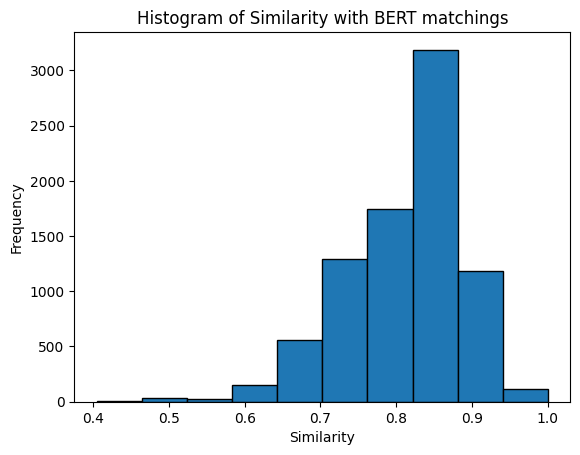

In [63]:
# distribution of similarity scores
import matplotlib.pyplot as plt
plt.hist(nodes['similarity_of_best_match'], bins=10, edgecolor='black')
plt.title('Histogram of Similarity with BERT matchings')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()


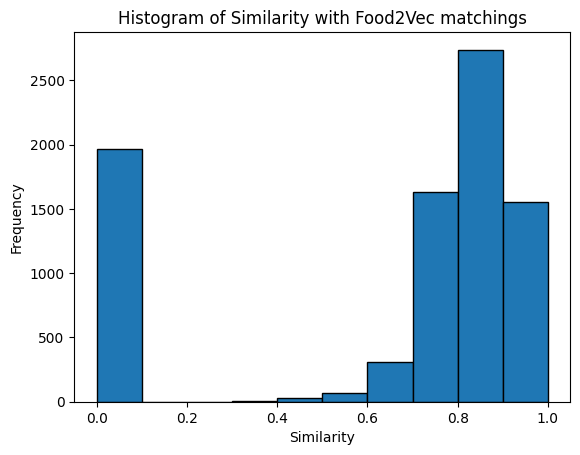

In [65]:
# distribution of similarity scores
import matplotlib.pyplot as plt
plt.hist(nodes_f2v['similarity_of_best_match'].fillna(0), bins=10, edgecolor='black')
plt.title('Histogram of Similarity with Food2Vec matchings')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()


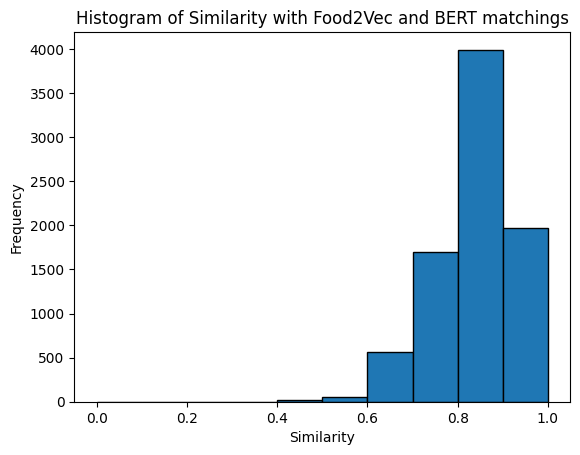

In [71]:
# distribution of similarity scores from joint data
import matplotlib.pyplot as plt
plt.hist(nodes_f2v['similarity_of_best_match_joint'].fillna(0), bins=10, edgecolor='black')
plt.title('Histogram of Similarity with Food2Vec and BERT matchings')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

## Exploration of the external data

In [13]:
# get list of columns ending with 'mg'
micro_columns_list = [element for element in nutri_data.columns if element.endswith('mg)')]

# get dataframe with subset of columns for micronutrients
df_micro = nutri_data[micro_columns_list]

# get summary statistics of micronutrient columns
pd.DataFrame(
	data={
		'average':df_micro.mean(),
		'standard_deviation':df_micro.std()
		}
)

,average,standard_deviation
Calcium_(mg),76.738214,203.527453
Iron_(mg),2.699674,5.687560
Magnesium_(mg),35.295988,57.416785
Phosphorus_(mg),165.142126,204.704214
Potassium_(mg),279.472740,375.483729
Sodium_(mg),312.495923,943.431341
Zinc_(mg),2.117438,3.437209
Copper_mg),0.195984,0.582596
Manganese_(mg),0.658156,7.248609
Vit_C_(mg),9.231134,68.854696
